# 1. Data Driven Forecasting

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsaplots

from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
# Import Dataset
cocacola=pd.read_excel('CocaCola_Sales_Rawdata.xlsx',parse_dates=True)
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
cocacola.dtypes

Quarter     object
Sales      float64
dtype: object

### Explore and Visualize the Series

In [3]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<Axes: >

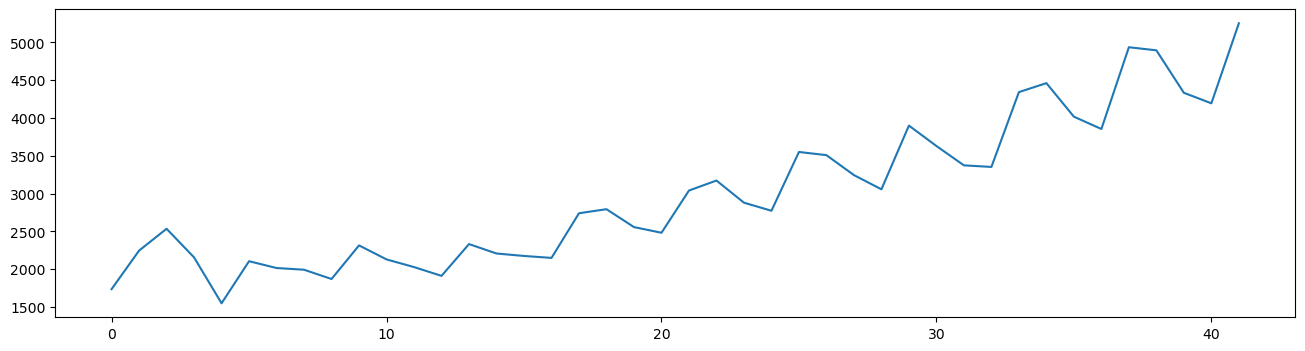

In [4]:
# Line plot
cocacola['Sales'].plot(figsize=(16,4))

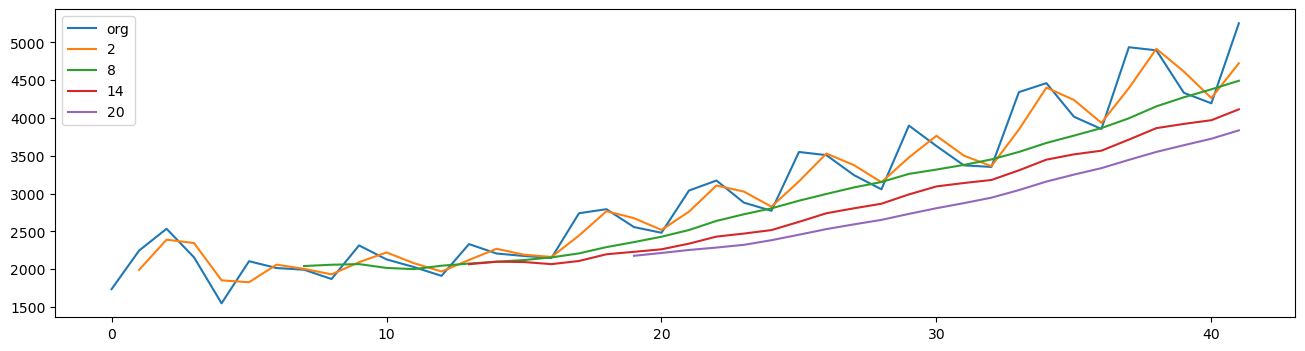

In [5]:
# Moving Average Smoothing
plt.figure(figsize=(16,4))
cocacola['Sales'].plot(label='org')
for i in range(2,24,6):     # 2 to 24 with step size = 6
    cocacola['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

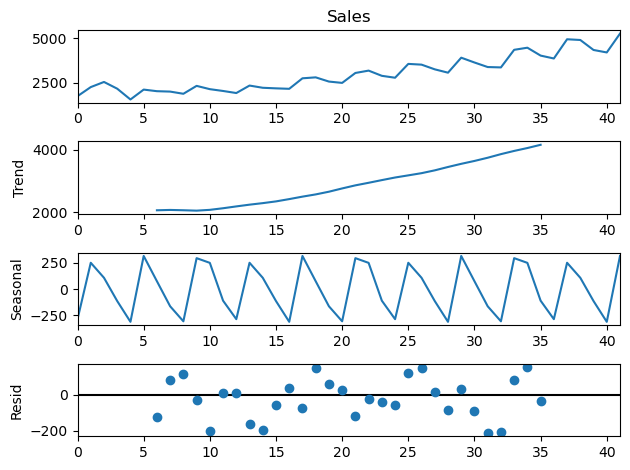

In [7]:
# Time Series Decomposition plot - To understand various componenents of data
cocacola_decompose=seasonal_decompose(cocacola['Sales'],period=12)
cocacola_decompose.plot();

C:\Users\tambe\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


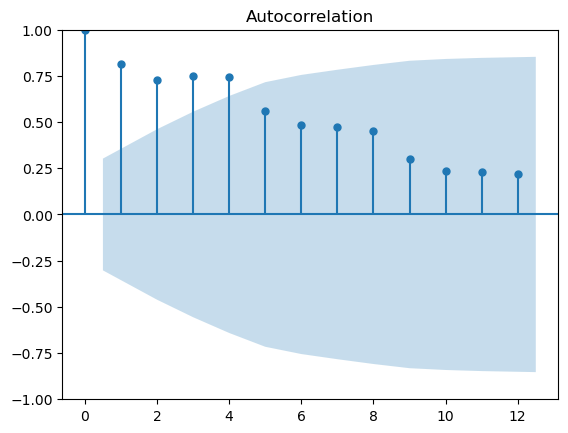

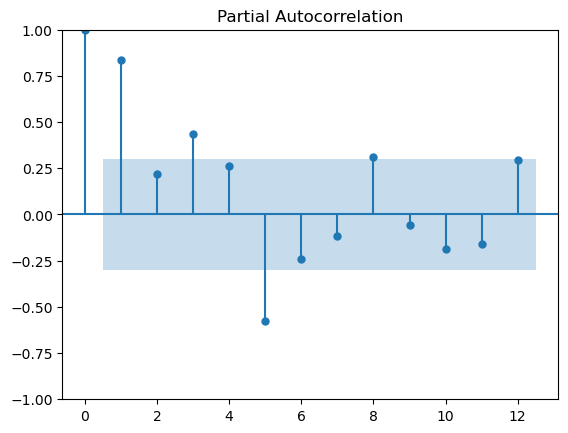

In [8]:
# ACF Plots and PACF Plots
tsaplots.plot_acf(cocacola['Sales'],lags=12)
tsaplots.plot_pacf(cocacola['Sales'],lags=12);

### Splitting Data into Train and Test

In [9]:
train=cocacola.head(33)
test=cocacola.tail(8)

### Data Driven Model Building - Exponential Smoothing Methods

In [10]:
# 1. Simple Exponential Smoothing Model
ses_model=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2) # α-value = Smoothing_level = 0.2
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
rmse=sqrt(mean_squared_error(test['Sales'],pred_ses))
rmse

1253.6857116659867

In [11]:
# 2. Holt's Exponential Smoothing Model
hes_model=Holt(train['Sales']).fit(smoothing_level=0.8,smoothing_slope=0.2) # β-value = smoothing_slope = 0.2
pred_hes=hes_model.predict(start=test.index[0],end=test.index[-1])
rmse=sqrt(mean_squared_error(test['Sales'],pred_hes))
rmse

C:\Users\tambe\AppData\Local\Temp\ipykernel_25020\2161459946.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hes_model=Holt(train['Sales']).fit(smoothing_level=0.8,smoothing_slope=0.2) # β-value = smoothing_slope = 0.2


1155.94215178365

In [12]:
# 3. Holt Winter Exponential Smoothing Model with additive trend and additive seasonality
hwes_add_add_model=ExponentialSmoothing(train['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit()
pred_hwes_add_add=hwes_add_add_model.predict(start=test.index[0],end=test.index[-1])
rmse=sqrt(mean_squared_error(test['Sales'],pred_hwes_add_add))
rmse

666.958378275064

In [13]:
# 4. Holt Winter Exponential Smoothing Model with additive trend and multiplicative seasonality
hwes_add_mul_model=ExponentialSmoothing(train['Sales'],trend='add',seasonal='mul',seasonal_periods=12).fit()
pres_hwes_add_mul=hwes_add_mul_model.predict(start=test.index[0],end=test.index[-1])
rmse=sqrt(mean_squared_error(test['Sales'],pres_hwes_add_mul))
rmse

527.918041428293

### Final Model

In [14]:
final_hwes_add_mul_model=ExponentialSmoothing(cocacola['Sales'],trend='add',seasonal='mul',seasonal_periods=12).fit()

### Forecasting

In [15]:
# Forecasting for next 12 time periods
forecast=final_hwes_add_mul_model.forecast(12)
forecast

42    5012.344209
43    4653.573883
44    4512.618744
45    5673.548341
46    5715.159774
47    5161.415217
48    4909.552114
49    6205.541243
50    6166.703338
51    5529.963063
52    5104.693031
53    6435.671650
dtype: float64

<Axes: >

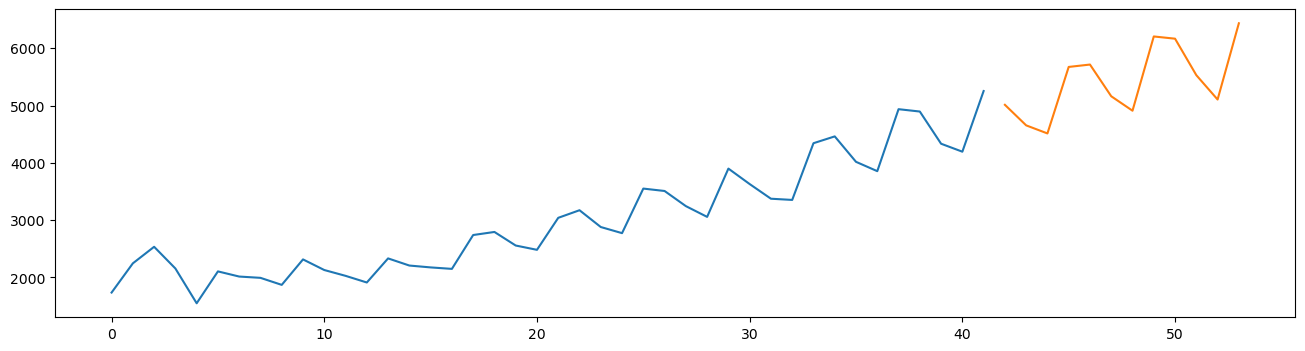

In [16]:
# Forecast Plot
cocacola['Sales'].plot(figsize=(16,4))
forecast.plot()

# 2. Model Based Forecasting

In [17]:
# Import Libraries
from datetime import datetime

In [19]:
# Import Dataset
cocacola1=pd.read_excel('CocaCola_Sales_Rawdata.xlsx',parse_dates=True)
cocacola1

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [20]:
# converting the Quarter column to datetime data

split_data=cocacola1.Quarter.str.split('_', expand=True)

split_data.columns=['Q','year']

dt=list()

for val in (pd.to_datetime(split_data['year'], format='%y')):  # val is value of the item inside the sequence on each iteration
    st=(datetime.date(val).strftime('%Y'))
    dt.append(st)

dt=pd.Series(dt)

split_data['Quarter']=dt.str.cat(split_data['Q'],sep="-")  # cat is Concatenate strings in the Series/Index with given separator

split_data.drop(columns=['Q','year'])

cocacola1['Quarter']=split_data['Quarter']

cocacola1.head()

,Quarter,Sales
0,1986-Q1,1734.827000
1,1986-Q2,2244.960999
2,1986-Q3,2533.804993
3,1986-Q4,2154.962997
4,1987-Q1,1547.818996


In [21]:
cocacola1['Date']=pd.PeriodIndex(cocacola1['Quarter'].values, freq='Q').to_timestamp()
cocacola1.head()

,Quarter,Sales,Date
0,1986-Q1,1734.827000,1986-01-01
1,1986-Q2,2244.960999,1986-04-01
2,1986-Q3,2533.804993,1986-07-01
3,1986-Q4,2154.962997,1986-10-01
4,1987-Q1,1547.818996,1987-01-01


In [22]:
cocacola_sales=cocacola1.drop('Quarter', axis=1)
cocacola_sales=cocacola_sales[['Date','Sales']]
cocacola_sales

,Date,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996
5,1987-04-01,2104.411995
6,1987-07-01,2014.362999
7,1987-10-01,1991.746998
8,1988-01-01,1869.049999
9,1988-04-01,2313.631996


### Explore and Visualize the Series

<Axes: >

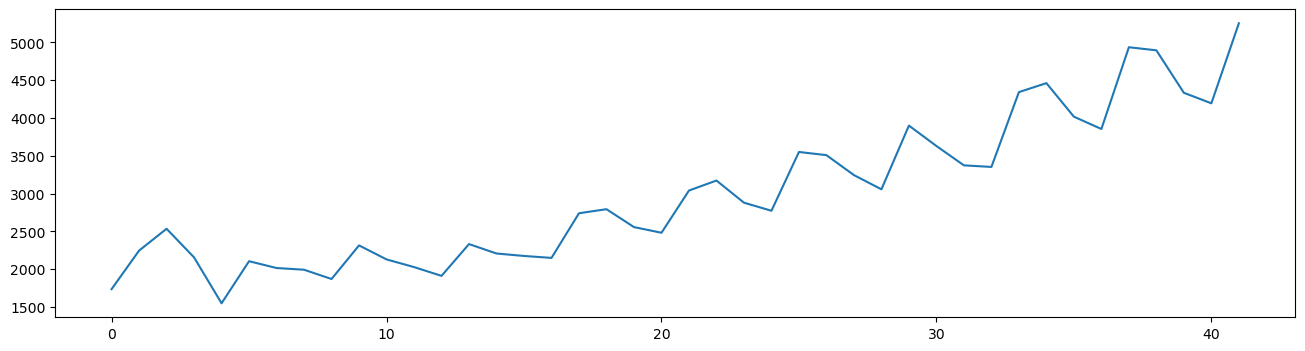

In [23]:
# line Plot
cocacola_sales['Sales'].plot(figsize=(16,4))

In [24]:
# Extracting day name,weekday name, month name, year name from the 'date' column using Date function (dt) from pandas.
# The strftime() function is used to convert date and time objects to their string representation.

cocacola_sales['day']=cocacola_sales['Date'].dt.strftime('%d') # Day Extraction
cocacola_sales['weekday']=cocacola_sales['Date'].dt.strftime('%A') # Weekday (sunday, monday, tuesday...) Extraction
cocacola_sales['month']=cocacola_sales['Date'].dt.strftime('%b') # Month (Jan, Feb, Mar...) Extraction
cocacola_sales['year']=cocacola_sales['Date'].dt.strftime('%Y') # Year Extraction
cocacola_sales['quarter']=cocacola_sales['Date'].dt.strftime('%BQS') # Quarter Extraction

In [24]:
cocacola_sales

,Date,Sales,day,weekday,month,year,quarter
0,1986-01-01,1734.827000,01,Wednesday,Jan,1986,JanuaryQS
1,1986-04-01,2244.960999,01,Tuesday,Apr,1986,AprilQS
2,1986-07-01,2533.804993,01,Tuesday,Jul,1986,JulyQS
3,1986-10-01,2154.962997,01,Wednesday,Oct,1986,OctoberQS
4,1987-01-01,1547.818996,01,Thursday,Jan,1987,JanuaryQS
5,1987-04-01,2104.411995,01,Wednesday,Apr,1987,AprilQS
6,1987-07-01,2014.362999,01,Wednesday,Jul,1987,JulyQS
7,1987-10-01,1991.746998,01,Thursday,Oct,1987,OctoberQS
8,1988-01-01,1869.049999,01,Friday,Jan,1988,JanuaryQS
9,1988-04-01,2313.631996,01,Friday,Apr,1988,AprilQS


In [25]:
# Make pivot table of year and quarter for plotting heatmap
sales_heatmap=pd.pivot_table(data=cocacola_sales,values='Sales',index='year',columns='quarter',aggfunc='mean',fill_value=0)
sales_heatmap

quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS
year,,,,
1986,2244.960999,1734.827000,2533.804993,2154.962997
1987,2104.411995,1547.818996,2014.362999,1991.746998
1988,2313.631996,1869.049999,2128.320000,2026.828999
1989,2331.164993,1910.603996,2206.549995,2173.967995
1990,2739.307999,2148.278000,2792.753998,2556.009995
1991,3039.522995,2480.973999,3172.115997,2879.000999
1992,3550.000000,2772.000000,3508.000000,3243.859993
1993,3899.000000,3056.000000,3629.000000,3373.000000
1994,4342.000000,3352.000000,4461.000000,4017.000000


<Axes: xlabel='quarter', ylabel='year'>

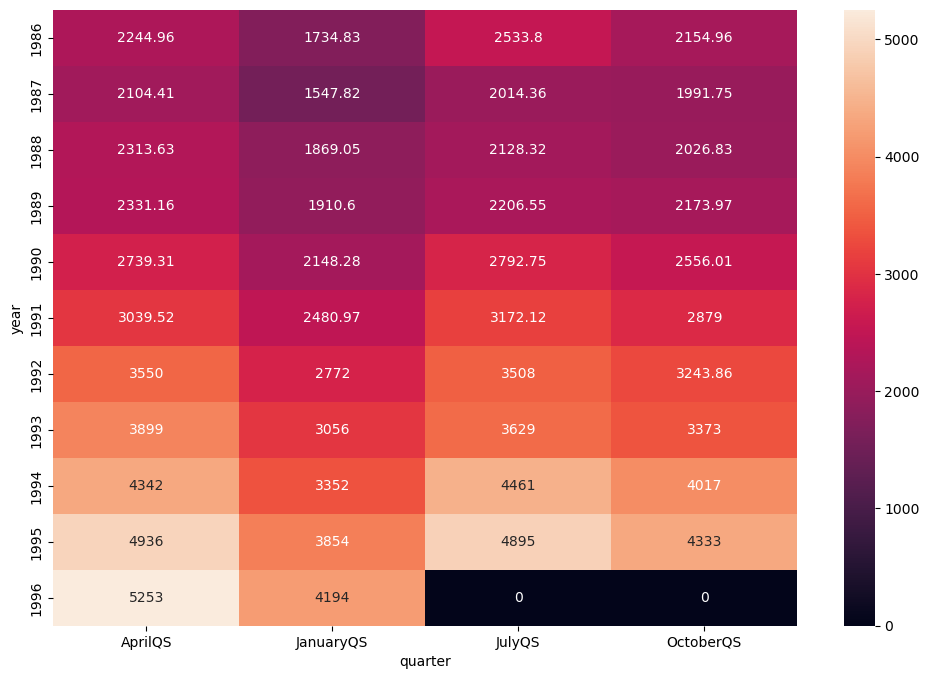

In [26]:
# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(sales_heatmap,annot=True,fmt='g')

<Axes: xlabel='year', ylabel='Sales'>

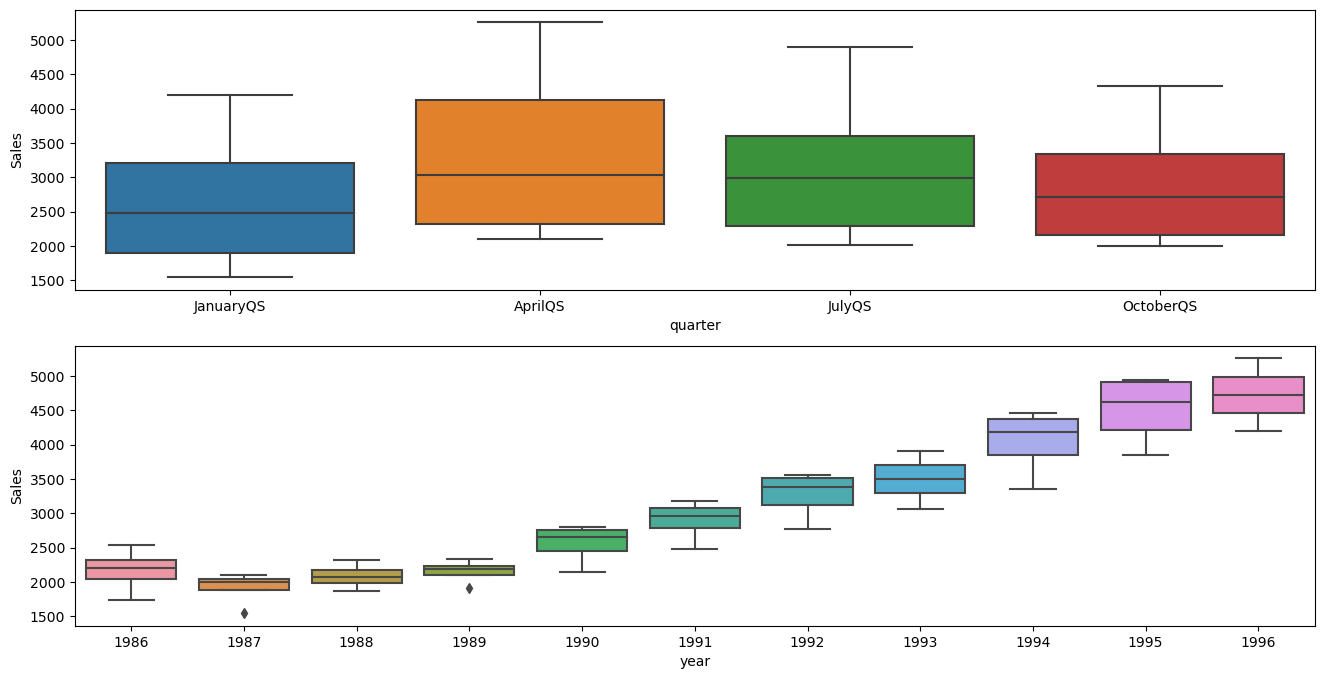

In [27]:
# Boxplots for quarters and years
plt.figure(figsize=(16,8))
plt.subplot(211)
sns.boxplot(x='quarter',y='Sales',data=cocacola_sales)
plt.subplot(212)
sns.boxplot(x='year',y='Sales',data=cocacola_sales)

<Axes: xlabel='year', ylabel='Sales'>

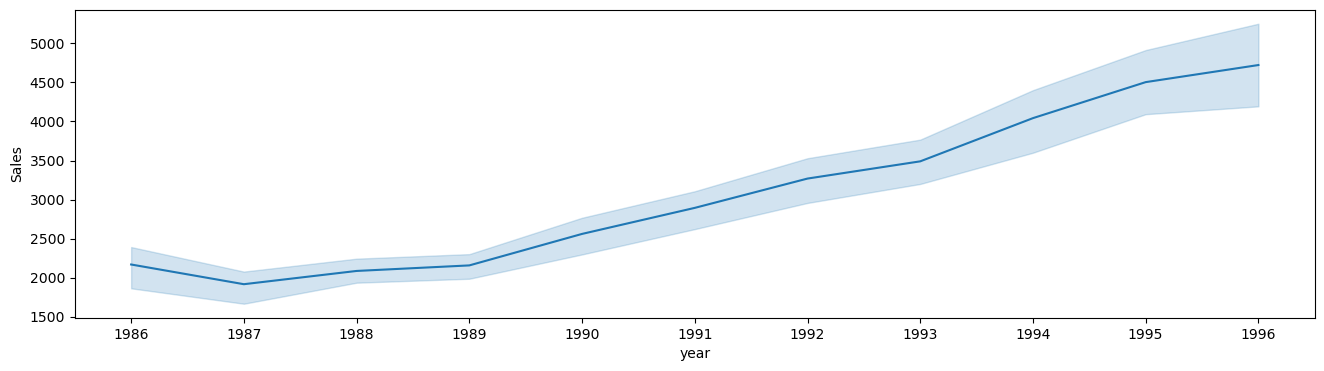

In [28]:
# Line plot of year vs passengers
plt.figure(figsize=(16,4))
sns.lineplot(x='year',y='Sales',data=cocacola_sales)

### Data Preprocessing

In [29]:
# Converting categorical data into numerical data
quarter_dummies=pd.DataFrame(pd.get_dummies(cocacola_sales['quarter']))
quarter_dummies

,AprilQS,JanuaryQS,JulyQS,OctoberQS
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
5,1,0,0,0
6,0,0,1,0
7,0,0,0,1
8,0,1,0,0
9,1,0,0,0


In [30]:
cocacola_sales

,Date,Sales,day,weekday,month,year,quarter
0,1986-01-01,1734.827000,01,Wednesday,Jan,1986,JanuaryQS
1,1986-04-01,2244.960999,01,Tuesday,Apr,1986,AprilQS
2,1986-07-01,2533.804993,01,Tuesday,Jul,1986,JulyQS
3,1986-10-01,2154.962997,01,Wednesday,Oct,1986,OctoberQS
4,1987-01-01,1547.818996,01,Thursday,Jan,1987,JanuaryQS
5,1987-04-01,2104.411995,01,Wednesday,Apr,1987,AprilQS
6,1987-07-01,2014.362999,01,Wednesday,Jul,1987,JulyQS
7,1987-10-01,1991.746998,01,Thursday,Oct,1987,OctoberQS
8,1988-01-01,1869.049999,01,Friday,Jan,1988,JanuaryQS
9,1988-04-01,2313.631996,01,Friday,Apr,1988,AprilQS


In [31]:
# Adding it to the dataset
cocacola_sales1=pd.concat([cocacola_sales,quarter_dummies],axis=1)
cocacola_sales1

,Date,Sales,day,weekday,month,year,quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS
0,1986-01-01,1734.827000,01,Wednesday,Jan,1986,JanuaryQS,0,1,0,0
1,1986-04-01,2244.960999,01,Tuesday,Apr,1986,AprilQS,1,0,0,0
2,1986-07-01,2533.804993,01,Tuesday,Jul,1986,JulyQS,0,0,1,0
3,1986-10-01,2154.962997,01,Wednesday,Oct,1986,OctoberQS,0,0,0,1
4,1987-01-01,1547.818996,01,Thursday,Jan,1987,JanuaryQS,0,1,0,0
5,1987-04-01,2104.411995,01,Wednesday,Apr,1987,AprilQS,1,0,0,0
6,1987-07-01,2014.362999,01,Wednesday,Jul,1987,JulyQS,0,0,1,0
7,1987-10-01,1991.746998,01,Thursday,Oct,1987,OctoberQS,0,0,0,1
8,1988-01-01,1869.049999,01,Friday,Jan,1988,JanuaryQS,0,1,0,0
9,1988-04-01,2313.631996,01,Friday,Apr,1988,AprilQS,1,0,0,0


In [32]:
# creating t, t_squared and log_passengers columns

cocacola_sales1['t']=np.arange(1,43)
cocacola_sales1['t_squared']=cocacola_sales1['t']*cocacola_sales1['t']
cocacola_sales1['log_sales']=np.log(cocacola_sales1['Sales'])
cocacola_sales1

,Date,Sales,day,weekday,month,year,quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS,t,t_squared,log_sales
0,1986-01-01,1734.827000,01,Wednesday,Jan,1986,JanuaryQS,0,1,0,0,1,1,7.458663
1,1986-04-01,2244.960999,01,Tuesday,Apr,1986,AprilQS,1,0,0,0,2,4,7.716443
2,1986-07-01,2533.804993,01,Tuesday,Jul,1986,JulyQS,0,0,1,0,3,9,7.837477
3,1986-10-01,2154.962997,01,Wednesday,Oct,1986,OctoberQS,0,0,0,1,4,16,7.675529
4,1987-01-01,1547.818996,01,Thursday,Jan,1987,JanuaryQS,0,1,0,0,5,25,7.344602
5,1987-04-01,2104.411995,01,Wednesday,Apr,1987,AprilQS,1,0,0,0,6,36,7.651791
6,1987-07-01,2014.362999,01,Wednesday,Jul,1987,JulyQS,0,0,1,0,7,49,7.608058
7,1987-10-01,1991.746998,01,Thursday,Oct,1987,OctoberQS,0,0,0,1,8,64,7.596767
8,1988-01-01,1869.049999,01,Friday,Jan,1988,JanuaryQS,0,1,0,0,9,81,7.533186
9,1988-04-01,2313.631996,01,Friday,Apr,1988,AprilQS,1,0,0,0,10,100,7.746574


### Splitting Data into Train and Test

In [33]:
# split into train and test
train_size=int(len(cocacola_sales1)*0.50)
cocacola_sales1_train,cocacola_sales1_test=cocacola_sales1[0:train_size],cocacola_sales1[train_size:]

In [34]:
cocacola_sales1_train

,Date,Sales,day,weekday,month,year,quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS,t,t_squared,log_sales
0,1986-01-01,1734.827000,01,Wednesday,Jan,1986,JanuaryQS,0,1,0,0,1,1,7.458663
1,1986-04-01,2244.960999,01,Tuesday,Apr,1986,AprilQS,1,0,0,0,2,4,7.716443
2,1986-07-01,2533.804993,01,Tuesday,Jul,1986,JulyQS,0,0,1,0,3,9,7.837477
3,1986-10-01,2154.962997,01,Wednesday,Oct,1986,OctoberQS,0,0,0,1,4,16,7.675529
4,1987-01-01,1547.818996,01,Thursday,Jan,1987,JanuaryQS,0,1,0,0,5,25,7.344602
5,1987-04-01,2104.411995,01,Wednesday,Apr,1987,AprilQS,1,0,0,0,6,36,7.651791
6,1987-07-01,2014.362999,01,Wednesday,Jul,1987,JulyQS,0,0,1,0,7,49,7.608058
7,1987-10-01,1991.746998,01,Thursday,Oct,1987,OctoberQS,0,0,0,1,8,64,7.596767
8,1988-01-01,1869.049999,01,Friday,Jan,1988,JanuaryQS,0,1,0,0,9,81,7.533186
9,1988-04-01,2313.631996,01,Friday,Apr,1988,AprilQS,1,0,0,0,10,100,7.746574


In [35]:
cocacola_sales1_test

,Date,Sales,day,weekday,month,year,quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS,t,t_squared,log_sales
21,1991-04-01,3039.522995,01,Monday,Apr,1991,AprilQS,1,0,0,0,22,484,8.019456
22,1991-07-01,3172.115997,01,Monday,Jul,1991,JulyQS,0,0,1,0,23,529,8.062154
23,1991-10-01,2879.000999,01,Tuesday,Oct,1991,OctoberQS,0,0,0,1,24,576,7.965199
24,1992-01-01,2772.000000,01,Wednesday,Jan,1992,JanuaryQS,0,1,0,0,25,625,7.927324
25,1992-04-01,3550.000000,01,Wednesday,Apr,1992,AprilQS,1,0,0,0,26,676,8.174703
26,1992-07-01,3508.000000,01,Wednesday,Jul,1992,JulyQS,0,0,1,0,27,729,8.162801
27,1992-10-01,3243.859993,01,Thursday,Oct,1992,OctoberQS,0,0,0,1,28,784,8.084519
28,1993-01-01,3056.000000,01,Friday,Jan,1993,JanuaryQS,0,1,0,0,29,841,8.024862
29,1993-04-01,3899.000000,01,Thursday,Apr,1993,AprilQS,1,0,0,0,30,900,8.268475
30,1993-07-01,3629.000000,01,Thursday,Jul,1993,JulyQS,0,0,1,0,31,961,8.196712


### Model Building on cocacola_sales1_train dataset (Model Based)

In [36]:
train=cocacola_sales1_train.head(14)
test=cocacola_sales1_train.tail(7)

In [37]:
train

,Date,Sales,day,weekday,month,year,quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS,t,t_squared,log_sales
0,1986-01-01,1734.827000,01,Wednesday,Jan,1986,JanuaryQS,0,1,0,0,1,1,7.458663
1,1986-04-01,2244.960999,01,Tuesday,Apr,1986,AprilQS,1,0,0,0,2,4,7.716443
2,1986-07-01,2533.804993,01,Tuesday,Jul,1986,JulyQS,0,0,1,0,3,9,7.837477
3,1986-10-01,2154.962997,01,Wednesday,Oct,1986,OctoberQS,0,0,0,1,4,16,7.675529
4,1987-01-01,1547.818996,01,Thursday,Jan,1987,JanuaryQS,0,1,0,0,5,25,7.344602
5,1987-04-01,2104.411995,01,Wednesday,Apr,1987,AprilQS,1,0,0,0,6,36,7.651791
6,1987-07-01,2014.362999,01,Wednesday,Jul,1987,JulyQS,0,0,1,0,7,49,7.608058
7,1987-10-01,1991.746998,01,Thursday,Oct,1987,OctoberQS,0,0,0,1,8,64,7.596767
8,1988-01-01,1869.049999,01,Friday,Jan,1988,JanuaryQS,0,1,0,0,9,81,7.533186
9,1988-04-01,2313.631996,01,Friday,Apr,1988,AprilQS,1,0,0,0,10,100,7.746574


In [38]:
test

,Date,Sales,day,weekday,month,year,quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS,t,t_squared,log_sales
14,1989-07-01,2206.549995,01,Saturday,Jul,1989,JulyQS,0,0,1,0,15,225,7.699185
15,1989-10-01,2173.967995,01,Sunday,Oct,1989,OctoberQS,0,0,0,1,16,256,7.684309
16,1990-01-01,2148.278000,01,Monday,Jan,1990,JanuaryQS,0,1,0,0,17,289,7.672422
17,1990-04-01,2739.307999,01,Sunday,Apr,1990,AprilQS,1,0,0,0,18,324,7.915461
18,1990-07-01,2792.753998,01,Sunday,Jul,1990,JulyQS,0,0,1,0,19,361,7.934783
19,1990-10-01,2556.009995,01,Monday,Oct,1990,OctoberQS,0,0,0,1,20,400,7.846203
20,1991-01-01,2480.973999,01,Tuesday,Jan,1991,JanuaryQS,0,1,0,0,21,441,7.816407


In [39]:
# 1. Linear Model
import statsmodels.formula.api as smf

linear_model=smf.ols('Sales~t',data=train).fit()
pred_linear=linear_model.predict(test['t'])
rmse_linear=sqrt(mean_squared_error(test['Sales'],pred_linear))
rmse_linear

403.8184976677398

In [40]:
# 2. Exponential Model

exp_model=smf.ols('log_sales~t',data=train).fit()
pred_exp=exp_model.predict(test['t'])
rmse_exp=sqrt(mean_squared_error(test['Sales'],np.exp(pred_exp)))  # as log was applied; apply exponential np.exp
rmse_exp

396.8814835749829

In [41]:
# 3. Quadratic Model

quad_model=smf.ols('Sales~t+t_squared',data=train).fit()
pred_quad=quad_model.predict(test[['t','t_squared']])
rmse_quad=sqrt(mean_squared_error(test['Sales'],pred_quad))
rmse_quad

226.41889131555902

In [42]:
# 4. Additive Seasonality Model

add_sea_model=smf.ols('Sales~JanuaryQS+AprilQS+JulyQS+OctoberQS',data=train).fit()
pred_add_sea=add_sea_model.predict(test[['JanuaryQS','AprilQS','JulyQS','OctoberQS']])
rmse_add_sea=sqrt(mean_squared_error(test['Sales'],pred_add_sea))
rmse_add_sea

460.26389383797294

In [43]:
# 5. Additive Seasonality Quadratic Model

add_sea_quad_model=smf.ols('Sales~JanuaryQS+AprilQS+JulyQS+OctoberQS+t+t_squared',data=train).fit()
pred_add_sea_quad=add_sea_quad_model.predict(
    test[['JanuaryQS','AprilQS','JulyQS','OctoberQS','t','t_squared']])
rmse_add_sea_quad=sqrt(mean_squared_error(test['Sales'],pred_add_sea_quad))
rmse_add_sea_quad

125.20962396062038

In [44]:
# 6. Multiplicative Seasonality Model

mul_sea_model=smf.ols('log_sales~JanuaryQS+AprilQS+JulyQS+OctoberQS',data=train).fit()
pred_mul_sea=mul_sea_model.predict(test[['JanuaryQS','AprilQS','JulyQS','OctoberQS']])
rmse_mul_sea=sqrt(mean_squared_error(test['Sales'],np.exp(pred_mul_sea)))  # as log was applied; apply exponential np.exp
rmse_mul_sea

464.6256718072622

In [45]:
# 7. Multiplicative Additive Seasonality

mul_add_sea_model=smf.ols('log_sales~JanuaryQS+AprilQS+JulyQS+OctoberQS+t',data=train).fit()
pred_mul_add_sea=mul_add_sea_model.predict(test[['JanuaryQS','AprilQS','JulyQS','OctoberQS','t']])
rmse_mul_add_sea=sqrt(mean_squared_error(test['Sales'],np.exp(pred_mul_add_sea)))  
rmse_mul_add_sea

426.1336142517827

In [46]:
# Compare the results (make table of two columns - Model and its RMSE value)

data={'Model':pd.Series(
    ['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mul_sea','rmse_mul_add_sea']),
     'RMSE_value':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea])}
rmse_table=pd.DataFrame(data)
rmse_table.sort_values('RMSE_value')

,Model,RMSE_value
4,rmse_add_sea_quad,125.209624
2,rmse_quad,226.418891
1,rmse_exp,396.881484
0,rmse_linear,403.818498
6,rmse_mul_add_sea,426.133614
3,rmse_add_sea,460.263894
5,rmse_mul_sea,464.625672


### Final Model

In [47]:
# Build the model on entire data set using add_sea_quad_model

model_final=smf.ols('Sales~JanuaryQS+AprilQS+JulyQS+OctoberQS+t+t_squared',data=cocacola_sales1_train).fit()

### Model Predictions on cocacola_sales1_test data

In [48]:
pred_new=model_final.predict(cocacola_sales1_test)
pred_new

21    3076.777021
22    3166.228306
23    3112.761790
24    2996.720157
25    3634.323891
26    3757.438004
27    3737.634316
28    3655.255512
29    4326.522073
30    4483.299014
31    4497.158154
32    4448.442178
33    5153.371568
34    5343.811337
35    5391.333305
36    5376.280157
37    6114.872375
38    6338.974972
39    6420.159769
40    6438.769449
41    7211.024495
dtype: float64

### Forecasting

In [49]:
import warnings
warnings.filterwarnings("ignore")
cocacola_sales1_test['Sales_forecast']=pred_new
cocacola_sales1_test

,Date,Sales,day,weekday,month,year,quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS,t,t_squared,log_sales,Sales_forecast
21,1991-04-01,3039.522995,01,Monday,Apr,1991,AprilQS,1,0,0,0,22,484,8.019456,3076.777021
22,1991-07-01,3172.115997,01,Monday,Jul,1991,JulyQS,0,0,1,0,23,529,8.062154,3166.228306
23,1991-10-01,2879.000999,01,Tuesday,Oct,1991,OctoberQS,0,0,0,1,24,576,7.965199,3112.761790
24,1992-01-01,2772.000000,01,Wednesday,Jan,1992,JanuaryQS,0,1,0,0,25,625,7.927324,2996.720157
25,1992-04-01,3550.000000,01,Wednesday,Apr,1992,AprilQS,1,0,0,0,26,676,8.174703,3634.323891
26,1992-07-01,3508.000000,01,Wednesday,Jul,1992,JulyQS,0,0,1,0,27,729,8.162801,3757.438004
27,1992-10-01,3243.859993,01,Thursday,Oct,1992,OctoberQS,0,0,0,1,28,784,8.084519,3737.634316
28,1993-01-01,3056.000000,01,Friday,Jan,1993,JanuaryQS,0,1,0,0,29,841,8.024862,3655.255512
29,1993-04-01,3899.000000,01,Thursday,Apr,1993,AprilQS,1,0,0,0,30,900,8.268475,4326.522073
30,1993-07-01,3629.000000,01,Thursday,Jul,1993,JulyQS,0,0,1,0,31,961,8.196712,4483.299014


<Axes: >

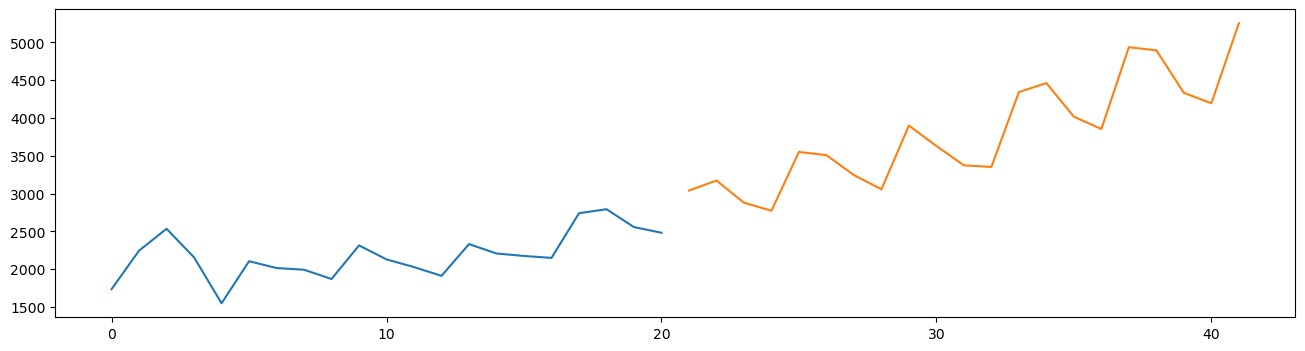

In [50]:
# Forecast Plot

cocacola_sales1_train['Sales'].plot(figsize=(16,4))
cocacola_sales1_test['Sales'].plot()